In [1]:
from sklearn import datasets
digits=datasets.load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

2


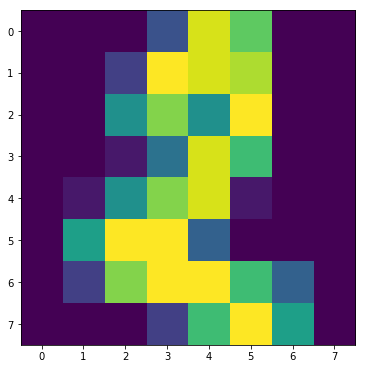

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(6,8))
X,y=digits.data,digits.target
#plt.plot(digits.images[0])
plt.imshow(digits.data[2].reshape((8,8)))
print(digits.target[2])
#help(plt.imshow)
#help(np.reshape)
#print(digits.data[0])

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=33,test_size=0.25)
print(KMeans())
kmeans=KMeans(n_clusters=10)
kmeans.fit(X_train)
y_pred=kmeans.predict(X_test)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [27]:
# 含有类别标记时，利用Adjusted Rand Index(ARI) 度量聚类效果的优劣
from sklearn.metrics import adjusted_rand_score
print(adjusted_rand_score(y_test,y_pred))

0.6194406106035973


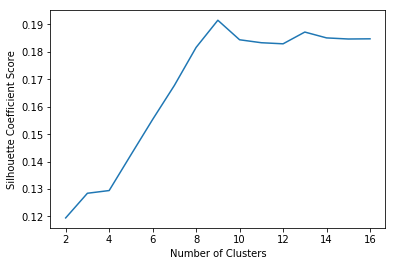

In [37]:
# 没有类别标记时，利用轮廓系数(Silhouette Coefficient) 度量聚类效果的质量
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
#print(silhouette_score())
sc_scores=[]
clusters=2+np.arange(15)
for K in clusters:
    kmeans_model=KMeans(n_clusters=K).fit(X_train)
    sc_score=silhouette_score(X_train,kmeans_model.labels_,metric="euclidean")
    sc_scores.append(sc_score)
plt.figure()
plt.plot(clusters,sc_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')
plt.show()

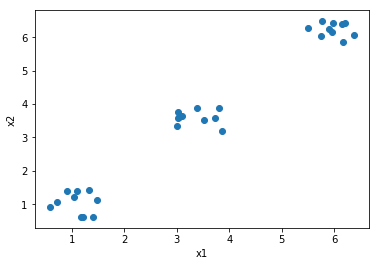

In [38]:
# 肘部法
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

cluster1=np.random.uniform(0.5,1.5,(2,10))
cluster2=np.random.uniform(5.5,6.5,(2,10))
cluster3=np.random.uniform(3,4,(2,10))

X=np.hstack((cluster1,cluster2,cluster3)).T
plt.scatter(X[:,0],X[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

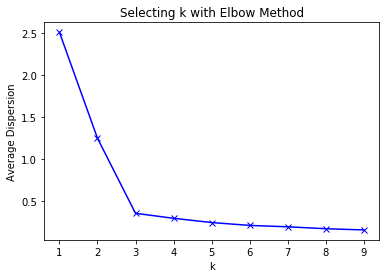

In [56]:
#help(cdist)
K=range(1,10)
meandistortions=[]
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'),axis=1))/X.shape[0])

plt.plot(K,meandistortions,'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with Elbow Method')
plt.show()


Dimension Reduction

In [42]:
import numpy as np
M=np.array([[1,2],[2,4]])
np.linalg.matrix_rank(M)

1

In [51]:
print(type(digits.target))
print(digits.target)

<class 'numpy.ndarray'>
[0 1 2 ... 8 9 8]


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


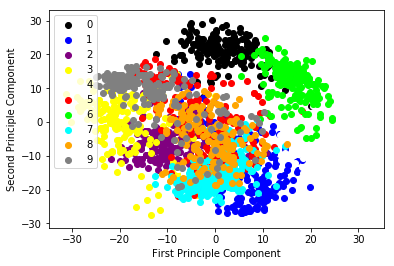

In [70]:
# PCA for dimension reduction
from sklearn.decomposition import PCA
print(PCA(n_components=2))
estimator=PCA(n_components=2)
X_pca=estimator.fit_transform(digits.data)
#index=np.arange(np.shape(digits.data)[0])
#print(index)
def plot_pca_scatter():
    colors=['black','blue','purple','yellow','white','red','lime','cyan','orange','gray']
    for i in range(len(colors)):
        index=[]
        for k in range(digits.data.shape[0]):
            if digits.target[k]==i:
                index.append(k)
        px=X_pca[index,0]
        py=X_pca[index,1]
        plt.scatter(px,py,c=colors[i])
    plt.legend(np.arange(0,10).astype(str))
    plt.xlabel('First Principle Component')
    plt.ylabel('Second Principle Component')
    plt.show()

plot_pca_scatter()

In [71]:
from sklearn import svm
svc=svm.SVC(kernel='linear')
svc.fit(X_train,y_train)
svc_predict=svc.predict(X_test)

estimator=PCA(n_components=20)
pca_X_train=estimator.fit_transform(X_train)
pca_X_test=estimator.transform(X_test)

pca_svc=svm.SVC(kernel='linear')
pca_svc.fit(pca_X_train,y_train)
pca_svc_predict=pca_svc.predict(pca_X_test)

In [72]:
from sklearn.metrics import classification_report
print(svc.score(X_test,y_test))
print(classification_report(y_test,svc_predict))

0.9844444444444445
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        35
          1       0.98      1.00      0.99        54
          2       1.00      1.00      1.00        44
          3       1.00      1.00      1.00        46
          4       0.97      0.97      0.97        35
          5       0.98      0.98      0.98        48
          6       1.00      0.98      0.99        51
          7       0.97      1.00      0.99        35
          8       0.97      0.97      0.97        58
          9       0.98      0.95      0.97        44

avg / total       0.98      0.98      0.98       450



In [73]:
print(pca_svc.score(pca_X_test,y_test))
print(classification_report(y_test,pca_svc_predict))

0.9666666666666667
             precision    recall  f1-score   support

          0       0.97      1.00      0.99        35
          1       0.93      1.00      0.96        54
          2       1.00      1.00      1.00        44
          3       0.98      0.98      0.98        46
          4       0.97      1.00      0.99        35
          5       0.96      0.98      0.97        48
          6       1.00      0.98      0.99        51
          7       0.97      1.00      0.99        35
          8       0.96      0.84      0.90        58
          9       0.93      0.93      0.93        44

avg / total       0.97      0.97      0.97       450

